In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from uncertainties import ufloat, unumpy
from scipy.signal import find_peaks

def oscillator(t, A, B, omega_plus, omega_minus, phi, d, C):
    return A*np.cos(omega_plus*(t-d)+phi) + B*np.cos(omega_minus*(t-d)+phi) + C

filenames = []
for i in range(1, 51):
    filename = "/home/ws10/maitrey/p442-integrated-lab/IV. Coupled Oscillator/DKMM/ALL{:04d}".format(i) + ".CSV"
    filenames.append(filename)


for i, file1 in enumerate(filenames):
    data = np.genfromtxt(file1, skip_header=18, delimiter=',')
    data[:, 0] = data[:, 0] - data[:, 0][0]
    data[:, 1] = data[:, 1] / np.max(data[:, 1])
    data[:, 2] = data[:, 2] - data[:, 2][0]
    data[:, 3] = data[:, 3] / np.max(data[:, 3])
    np.savetxt('DLL{:04d}'.format(i+1) + '.CSV', data, delimiter=',')


# filename = '/home/ws10/maitrey/p442-integrated-lab/IV. Coupled Oscillator/DKMM/ALL0050.CSV'
# data = np.genfromtxt(filename, skip_header=18, delimiter=',')


# # t1 = data[:, 0] # first wave
# data[:, 0] = data[:, 0] - data[:, 0][0]
# # y1 = data[:, 1] # first wave
# data[:, 1] = data[:, 1] / np.max(data[:, 1])
# # t2 = data[:, 2] # second wave
# data[:, 2] = data[:, 2] - data[:, 2][0]
# # y2 = data[:, 3] # second wave
# data[:, 3] = data[:, 3] / np.max(data[:, 3])

# Create an empty list to store fit parameters for each file
fit_params1 = []
fit_params2 = []
fit_params1_u = []

[ 6.02832851e-01  2.49472640e-01  7.12286778e+01  8.33260685e+01
  3.16989030e+02 -1.03993326e-01  8.62407749e-02]
[0.6028328505761817+/-0.0008766872438814897, 0.24947263953669144+/-0.0008756776010593886, 71.22867776252346+/-0.0025066616016685903, 83.32606845641814+/-0.006094205937276608, 316.989029532129+/-0.04746256212381065, -0.10399332560862665+/-0.0006526268653386184, 0.08624077494866184+/-0.0006155370800141696]
5.283+/-0.013 0.5637+/-0.0010


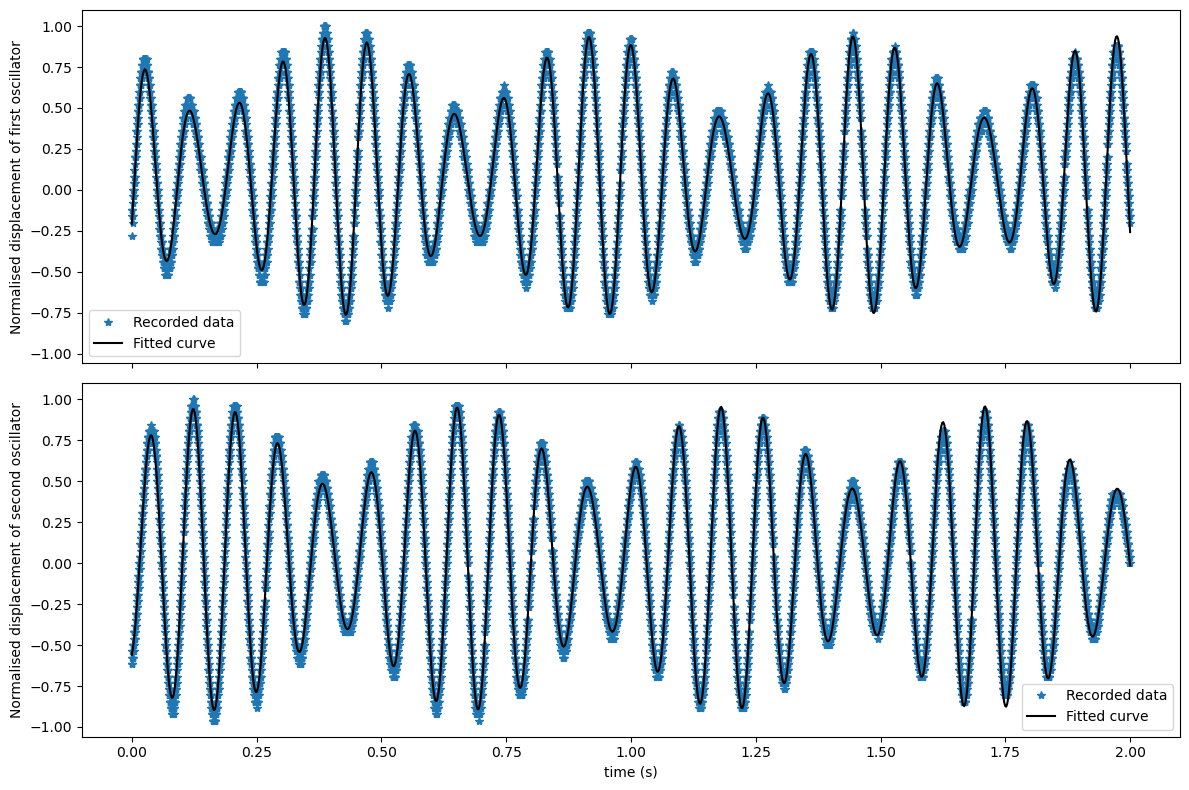

[[ 7.68580524e-07  2.36824478e-08  1.51761995e-08 -4.56947517e-07
  -2.48776918e-06 -3.48929193e-08 -9.42783208e-09]
 [ 2.36824478e-08  7.66811261e-07  2.24914950e-07  2.02813486e-08
  -1.15823362e-06 -1.32197830e-08 -7.19123808e-09]
 [ 1.51761995e-08  2.24914950e-07  6.28335239e-06  6.42283112e-07
  -3.85895795e-05 -4.44334319e-07  2.37039720e-08]
 [-4.56947517e-07  2.02813486e-08  6.42283112e-07  3.71393460e-05
   2.32215731e-04  3.28217440e-06  1.70175054e-08]
 [-2.48776918e-06 -1.15823362e-06 -3.85895795e-05  2.32215731e-04
   2.25269480e-03  3.09135290e-05 -1.95585048e-07]
 [-3.48929193e-08 -1.32197830e-08 -4.44334319e-07  3.28217440e-06
   3.09135290e-05  4.25921825e-07 -2.32283158e-09]
 [-9.42783208e-09 -7.19123808e-09  2.37039720e-08  1.70175054e-08
  -1.95585048e-07 -2.32283158e-09  3.78885897e-07]]


In [2]:
file1 = '/home/ws10/maitrey/p442-integrated-lab/IV. Coupled Oscillator/DKMM/DLL0001.CSV'
data = np.loadtxt(file1, delimiter=',')
t1 = data[:, 0] # first wave
y1 = data[:, 1] # first wave
t2 = data[:, 2] # second wave
y2 = data[:, 3] # second wave
sigma = np.ones(len(t1))*0.0004
guess = (0.617704, 0.243294, 70.7494, 84.239, 319.04, -0.0768066, 0.0858925)
# print(t1, y1)

popt1, pcov1 = curve_fit(oscillator, t1, y1, sigma=sigma, p0=guess)
popt2, pcov2 = curve_fit(oscillator, t2, y2, sigma=sigma, p0=guess)
print(popt1)
perr1 = np.sqrt(np.diag(pcov1))
perr2 = np.sqrt(np.diag(pcov2))
popt1_u = [ufloat(p, e) for p, e in zip(popt1, perr1)]
popt2_u = [ufloat(p, e) for p, e in zip(popt2, perr2)]
print(popt1_u)
A_1, B_1, omega_plus_1, omega_minus_1, phi_1, d_1, C_1 = popt1
A_2, B_2, omega_plus_2, omega_minus_2, phi_2, d_2, C_2 = popt2
A_1_u, B_1_u, omega_plus_1_u, omega_minus_1_u, phi_1_u, d_1_u, C_1_u = popt1_u
A_2_u, B_2_u, omega_plus_2_u, omega_minus_2_u, phi_2_u, d_2_u, C_2_u = popt2_u
fit_params1.append(popt1_u)
fit_params2.append(popt2_u)
# A_1 = abs(A_1)
# B_1 = abs(B_1)
# A_2 = abs(A_2)
# B_2 = abs(B_2)
DELTA_1_u = (omega_plus_1_u - omega_minus_1_u) * (abs(B_1_u) - abs(A_1_u)) / (abs(B_1_u) + abs(A_1_u)) # Detuning
OMEGA_1_u = (omega_plus_1_u - omega_minus_1_u) * (1 - ((abs(B_1_u) - abs(A_1_u)) / (abs(B_1_u) + abs(A_1_u)))**2)**0.5 # Rabi Frequency
omega_g_u = (omega_plus_1_u + omega_minus_1_u - DELTA_1_u) / 2 # Ground State Frequency
DELTA_2_u = (omega_plus_2_u - omega_minus_2_u) * (abs(B_2_u) - abs(A_2_u)) / (abs(B_2_u) + abs(A_2_u)) # Detuning
OMEGA_2_u = (omega_plus_2_u - omega_minus_2_u) * (1 - ((abs(B_2_u) - abs(A_2_u)) / (abs(B_2_u) + abs(A_2_u)))**2)**0.5 # Rabi Frequency
omega_e_u = (omega_plus_2_u + omega_minus_2_u - DELTA_2_u) / 2 # Excited State Frequency
DELTA_u = (DELTA_1_u + DELTA_2_u) / 2 # Average Detuning
OMEGA_u = (OMEGA_1_u + OMEGA_2_u) / 2 # Average Rabi Frequency
GEOMETRIC_PHASE_u = np.pi * (1 - (DELTA_u / (unumpy.sqrt(OMEGA_u**2 + DELTA_u**2)))) # Geometric Phase
fit_params1_u.append([DELTA_u, GEOMETRIC_PHASE_u/np.pi])
print(DELTA_u, GEOMETRIC_PHASE_u/np.pi)
curve_t1 = np.linspace(0, 2, 1000)
curve_y1 = oscillator(curve_t1, A_1, B_1, omega_plus_1, omega_minus_1, phi_1, d_1, C_1)
curve_t2 = np.linspace(0, 2, 1000)
curve_y2 = oscillator(curve_t2, A_2, B_2, omega_plus_2, omega_minus_2, phi_2, d_2, C_2)
# print(curve_y2)
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 8), sharex=True, sharey=True)

ax1.plot(t1, y1, '*', label='Recorded data')
ax1.plot(curve_t1, curve_y1, 'black', label='Fitted curve')
# ax1.set_xlabel('time (s)')
ax1.set_ylabel('Normalised displacement of first oscillator')
ax1.legend()

ax2.plot(t2, y2, '*', label='Recorded data')
ax2.plot(curve_t2, curve_y2, 'black', label='Fitted curve')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Normalised displacement of second oscillator')
ax2.legend()


fig.align_ylabels()
plt.tight_layout()
# fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)
plt.savefig(f"{file1[-6:-4]}.png",dpi=600)
plt.show()
print(pcov1)

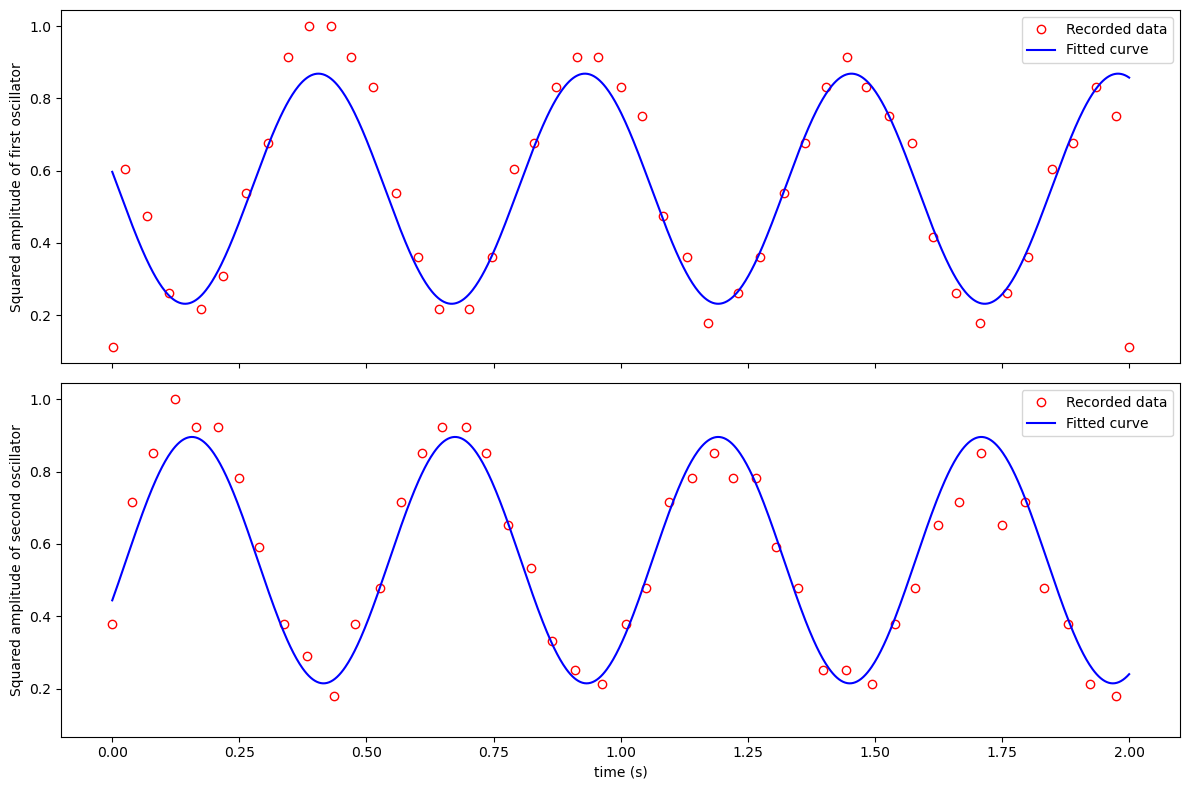

In [3]:
file1 = '/home/ws10/maitrey/p442-integrated-lab/IV. Coupled Oscillator/DKMM/DLL0001.CSV'
data = np.loadtxt(file1, delimiter=',')
t1 = data[:, 0] # first wave
y1 = data[:, 1]-0.1 # first wave
t2 = data[:, 2] # second wave
y2 = data[:, 3] # second wave

y1_square = y1**2
# Normalise the data
y1_square = y1_square / max(y1_square)
peaks1, _ = find_peaks(y1_square, height=0.1, distance=60)
y2_square = y2**2
# Normalise the data
y2_square = y2_square / max(y2_square)
peaks2, _ = find_peaks(y2_square, height=0.1, distance=60)


def sine_squared(x, A, omega, phi, C):
    return A * np.sin(omega * x + phi)**2 + C

t1_peaks = t1[peaks1]
y1_peaks = y1_square[peaks1]

t2_peaks = t2[peaks2]
y2_peaks = y2_square[peaks2]

# Write squared amplitude data to file as (x,y) pairs
np.savetxt('test_please.txt', np.transpose([t1_peaks, y1_peaks]), delimiter=',', fmt='%1.3f')

popt1, _ = curve_fit(sine_squared, t1_peaks, y1_peaks, p0=[-0.636255, 5.99238, 0.711885,0.868247])
popt2, _ = curve_fit(sine_squared, t2_peaks, y2_peaks, p0=[-0.636255, 5.99238, 0.711885,0.868247])

# Plot the fitted curves

# first intialise point for fitted function
curve_t1 = np.linspace(0, 2, 1000)
curve_y1 = sine_squared(curve_t1, *popt1)
curve_t2 = np.linspace(0, 2, 1000)
curve_y2 = sine_squared(curve_t2, *popt2)
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 8), sharex=True, sharey=True)

ax1.plot(t1_peaks, y1_peaks, 'o', label='Recorded data', markerfacecolor='none', markeredgecolor='red')
ax1.plot(curve_t1, curve_y1, 'blue', label='Fitted curve')
# ax1.set_xlabel('time (s)')
ax1.set_ylabel('Squared amplitude of first oscillator')
ax1.legend()

ax2.plot(t2_peaks, y2_peaks, 'o', label='Recorded data', markerfacecolor='none', markeredgecolor='red')
ax2.plot(curve_t2, curve_y2, 'blue', label='Fitted curve')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Squared amplitude of second oscillator')
ax2.legend()


fig.align_ylabels()
plt.tight_layout()
# fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)
plt.savefig(f"{file1[-6:-4]}_squared.png",dpi=600)
plt.show()

In [4]:
# Plot of omega_plus and omega_minus with detuning with error bars

# Detuning is first element in fit_params1_u
# omega_plus and omega_minus are third and fourth elements in fit_params1

omega_plus_u = np.array([fit_params1[i][2].nominal_value for i in range(len(fit_params1))])
omega_minus_u = np.array([fit_params1[i][3].nominal_value for i in range(len(fit_params1))])

omega_plus_u_err = np.array([fit_params1[i][2].std_dev for i in range(len(fit_params1))])
omega_minus_u_err = np.array([fit_params1[i][3].std_dev for i in range(len(fit_params1))])

x_nom = np.array([fit_params1_u[i][0].nominal_value for i in range(len(fit_params1_u))])
x_err = np.array([fit_params1_u[i][0].std_dev for i in range(len(fit_params1_u))])


# Define fit function
def parabolic1(x, a, b):
    return a * x**2 + b

def parabolic2(x, a, b):
    return -a * x**2 + b
# Fit parabola to data
popt1, pcov1 = curve_fit(parabolic2, x_nom, omega_plus_u, sigma=omega_plus_u_err)
popt2, pcov2 = curve_fit(parabolic1, x_nom, omega_minus_u, sigma=omega_minus_u_err)

# Plot data
plt.errorbar(x_nom, omega_plus_u, yerr=omega_plus_u_err, fmt='o', label='omega_plus')
plt.errorbar(x_nom, omega_minus_u, yerr=omega_minus_u_err, fmt='o', label='omega_minus')

# Plot fit
x = np.linspace(-6, 6, 1000)
plt.plot(x, parabolic1(x, *popt1), label='omega_plus fit')
plt.plot(x, parabolic2(x, *popt2), label='omega_minus fit')

plt.xlabel('Detuning (rad/s)')
plt.ylabel('Frequency (rad/s)')
plt.legend()
plt.savefig(f"{file1[-6:-4]}_freq_det.png",dpi=600)
plt.show()

TypeError: Improper input: func input vector length N=2 must not exceed func output vector length M=1

In [ ]:
import matplotlib.pyplot as plt
from uncertainties import ufloat

# Geometric phase fit function
def phi_G(DELTA, OMEGA):
    return (1 - (DELTA / (np.sqrt(OMEGA**2 + DELTA**2))))

# Get x and y data points
x_nom = np.array([fit_params1_u[i][0].nominal_value for i in range(len(fit_params1_u))])
x_err = np.array([fit_params1_u[i][0].std_dev for i in range(len(fit_params1_u))])

y_nom = np.array([fit_params1_u[i][1].nominal_value for i in range(len(fit_params1_u))])
y_err = np.array([fit_params1_u[i][1].std_dev for i in range(len(fit_params1_u))])

print(x_nom)

# Plot data points with error bars



# Fit function
popt, pcov = curve_fit(phi_G, x_nom, y_nom, sigma=y_err, absolute_sigma=True)

# Plot fitted function with figure size
x_fit = np.linspace(-15, 15, 1000)
y_fit = phi_G(x_fit, *popt)
plt.plot(x_fit, y_fit, label='fit')
plt.errorbar(x_nom, y_nom, xerr=x_err, yerr=y_err, fmt='o', label='data')
plt.title('Geometric phase vs detuning')
plt.xlabel('Detuning (rad/s)')
plt.ylabel('Geometric phase (rad)')
plt.legend()
plt.grid()
plt.savefig('Geometric_phase.png', dpi=600)
plt.show()

# Make another plot with x and y limits
plt.plot(x_fit, y_fit, label='fit')
plt.errorbar(x_nom, y_nom, xerr=x_err, yerr=y_err, fmt='o', label='data')
plt.title('Geometric phase vs detuning')
plt.xlabel('Detuning (rad/s)')
plt.ylabel('Geometric phase (rad)')
plt.legend()
plt.grid()
plt.xlim(2, 3)
plt.ylim(0.77, 0.83)
plt.savefig('Zoomed_in_geometric_phase.png', dpi=600)
plt.show()